# Unit 5 - Financial Planning

In [57]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [58]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [59]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [60]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [61]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()
btc_price = btc_content['data']['1']['quotes']['USD']['price']

In [62]:
# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()
eth_price = eth_content['data']['1027']['quotes']['USD']['price']

In [63]:
# Compute current value of my crpto
my_btc_value = (my_btc*btc_price)

my_eth_value = (my_eth*eth_price)

crypto_val = (my_btc*btc_price)+(my_eth*eth_price)
crypto_val_format = "${:,.2f}".format(crypto_val)

print(f"The current total value of cryptocurrency in this portfolio is {crypto_val_format}")

The current total value of cryptocurrency in this portfolio is $98,235.21


In [64]:
# Print current crypto wallet balance
btc_val_format = "${:,.2f}".format(my_btc_value)
eth_val_format = "${:,.2f}".format(my_eth_value)
print(f"The current value of your {my_btc} BTC is {btc_val_format}")
print(f"The current value of your {my_eth} ETH is {eth_val_format}")

The current value of your 1.2 BTC is $76,147.20
The current value of your 5.3 ETH is $22,088.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [65]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [66]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [69]:
# Format current date as ISO format
hoy = pd.to_datetime("now")
five_ago = pd.to_datetime("now")-relativedelta(years=5)
today = pd.Timestamp(hoy, tz="America/New_York").isoformat

In [70]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df
# Preview DataFrame
df_portfolio

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2017-11-03 00:00:00-04:00  109.48  109.4800  109.2900  109.46  1511462   
2017-11-06 00:00:00-05:00  109.56  109.5900  109.4600  109.54  1120425   
2017-11-07 00:00:00-05:00  109.58  109.6100  109.4900  109.57  1617243   
2017-11-08 00:00:00-05:00  109.54  109.6000  109.4600  109.50  2228734   
2017-11-09 00:00:00-05:00  109.39  109.4600  109.3000  109.42  1941380   
...                           ...       ...       ...     ...      ...   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.18  3999066   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07  5881766   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637   
2021-10-25 00:00:00-04:00  114.06  114.2000  114.0600  114.18   516246   

                              SPY                                      
                             open     high     low    close    volume  
time                                                                   
2017-11-03 00:00:00-04:00  257.78  258.500  257.30  258.440  38008582  
2017-11-06 00:00:00-05:00  258.29  259.000  258.22  258.820  22683758  
2017-11-07 00:00:00-05:00  258.97  259.350  258.09  258.700  40140309  
2017-11-08 00:00:00-05:00  258.46  259.220  258.15  259.130  32174191  
2017-11-09 00:00:00-05:00  257.73  258.390  256.36  258.200  75322217  
...                           ...      ...     ...      ...       ...  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.680  40790864  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.390  41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.610  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.130  50771701  
2021-10-25 00:00:00-04:00  454.28  454.300  452.39  452.765   3550165  

[1000 rows x 10 columns]

In [71]:
# Pick AGG and SPY close prices
agg_close_price =float(df_portfolio["AGG"]["close"]['2021-10-22 00:00:00-04:00'])
spy_close_price =float(df_portfolio["SPY"]["close"]['2021-10-22 00:00:00-04:00'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.07
Current SPY closing price: $453.13


In [72]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
spy_val_format = "${:,.2f}".format(my_spy_value)

my_agg_value = my_agg*agg_close_price
agg_val_format = "${:,.2f}".format(my_agg_value)

total_stock_value = my_spy_value + my_agg_value
tot_val_format = "${:,.2f}".format(total_stock_value)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is {spy_val_format}")
print(f"The current value of your {my_agg} AGG shares is {agg_val_format}")
print(f"The total value of your stock market investment is {tot_val_format}")

The current value of your 50 SPY shares is $22,656.50
The current value of your 200 AGG shares is $22,814.00
The total value of your stock market investment is $45,470.50


### Savings Health Analysis

In [73]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
investment_data = {'Amount':{'Crypto':crypto_val, 'Shares':total_stock_value}}

# Create savings DataFrame
df_value=pd.DataFrame(investment_data)

# Display savings DataFrame
df_value


,Amount
Crypto,98235.215
Shares,45470.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

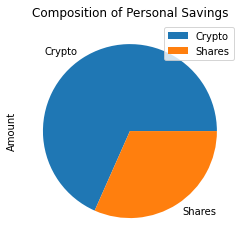

In [74]:
# Plot savings pie chart
df_value.plot.pie( y='Amount', title = 'Composition of Personal Savings')

In [75]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund_format = "${:,.2f}".format(emergency_fund)
emergency_fund_format

'$36,000.00'

In [76]:
# Calculate total amount of savings
total_savings = total_stock_value+crypto_val
total_savings_format = "${:,.2f}".format(total_savings)
total_savings_format

'$143,705.71'

In [77]:
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats! You've saved {total_savings_format} which is {round(total_savings/emergency_fund,3)} times your recommended Emergency Savings Amount of {emergency_fund_format}!")
elif total_savings < emergency_fund:
    print(f"Ruh roh! You need to save {emergency_fund-total_savings} in order to be safe! Run for your life!")
else:
    print(f"You're right on the money with your savings, but what if there's a bigger emergency?!")

Congrats! You've saved $143,705.71 which is 3.992 times your recommended Emergency Savings Amount of $36,000.00!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [80]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp(five_ago, tz='America/New_York').isoformat()
end_date = pd.Timestamp(hoy, tz='America/New_York').isoformat()

In [81]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


tickers = ["SPY", "AGG"]
timeframe = '1D'

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2017-11-03 00:00:00-04:00  109.48  109.48  109.29  109.46  1511462  257.78   
2017-11-06 00:00:00-05:00  109.56  109.59  109.46  109.54  1120425  258.29   
2017-11-07 00:00:00-05:00  109.58  109.61  109.49  109.57  1617243  258.97   
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.50  2228734  258.46   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.42  1941380  257.73   

                                                             
                             high     low   close    volume  
time                                                         
2017-11-03 00:00:00-04:00  258.50  257.30  258.44  38008582  
2017-11-06 00:00:00-05:00  259.00  258.22  258.82  22683758  
2017-11-07 00:00:00-05:00  259.35  258.09  258.70  40140309  
2017-11-08 00:00:00-05:00  259.22  258.15  259.13  32174191  
2017-11-09 00:00:00-05:00  258.39  256.36  258.20  75322217

In [84]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_spy_agg = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 1000,
    num_trading_days = 252*30)

In [85]:
# Printing the simulation input data
MC_spy_agg.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2017-11-03 00:00:00-04:00  109.48  109.48  109.29  109.46  1511462   
2017-11-06 00:00:00-05:00  109.56  109.59  109.46  109.54  1120425   
2017-11-07 00:00:00-05:00  109.58  109.61  109.49  109.57  1617243   
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.50  2228734   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.42  1941380   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-11-03 00:00:00-04:00          NaN  257.78  258.50  257.30  258.44   
2017-11-06 00:00:00-05:00     0.000731  258.29  259.00  258.22  258.82   
2017-11-07 00:00:00-05:00     0.000274  258.97  259.35  258.09  258.70   
2017-11-08 00:00:00-05:00    -0.000639  258.46  259.22  258.15  259.13   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.39  256.36  258.20   

                                                  
                             volume daily_return  
time                                              
2017-11-03 00:00:00-04:00  38008582          NaN  
2017-11-06 00:00:00-05:00  22683758     0.001470  
2017-11-07 00:00:00-05:00  40140309    -0.000464  
2017-11-08 00:00:00-05:00  32174191     0.001662  
2017-11-09 00:00:00-05:00  75322217    -0.003589

In [86]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_spy_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjmcd\FinTech\upenn-phi-virt-fin-pt-08-2021-u-c-master-05-APIs\upenn-phi-virt-fin-pt-08-2021-u-c-master-05-APIs\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017243,0.998195,1.005701,0.999247,1.006127,1.000878,1.003011,0.999216,1.007612,0.991673,...,0.999218,1.000477,1.003892,1.003839,0.992451,1.004576,0.997858,1.002732,0.999331,1.001773
2,1.021132,0.998562,1.000459,1.000242,1.019425,0.992659,1.008893,0.993443,1.009481,0.993235,...,1.007041,0.996575,1.001992,0.994576,0.988877,1.007989,0.998464,0.995601,0.998074,0.997717
3,1.027420,1.000171,0.988201,0.991980,1.028363,0.997975,1.005693,0.988652,1.009068,1.001516,...,0.998376,0.993455,1.011773,1.002951,0.993678,1.003655,0.989283,0.992068,0.994283,1.003788
4,1.037171,1.008251,0.982677,0.988899,1.036579,1.000368,1.001653,0.986871,1.007454,1.012678,...,1.007039,0.998055,1.005530,0.999039,0.999351,0.992872,0.999880,0.996012,0.992610,1.003657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.352168,3.665523,3.984869,4.104247,5.797775,14.091308,6.817748,7.277648,7.449365,11.240639,...,9.658353,6.693000,5.175916,12.841483,10.885973,16.078437,6.314158,1.575646,11.559971,9.554342
7557,5.371645,3.653375,4.014081,4.136228,5.722955,14.117813,6.809369,7.249482,7.477862,11.231474,...,9.727951,6.676425,5.185337,12.847085,10.916627,16.223400,6.349241,1.559650,11.574996,9.587189
7558,5.349740,3.666590,4.015288,4.098373,5.748941,14.172986,6.767614,7.251526,7.555017,11.183407,...,9.711760,6.649157,5.150682,12.839126,10.871237,16.264817,6.352906,1.550697,11.561316,9.671812
7559,5.338927,3.682942,3.992996,4.093773,5.727160,14.160738,6.744481,7.245372,7.546785,11.206408,...,9.677217,6.649617,5.122544,12.863310,10.866276,16.268328,6.342336,1.549454,11.673861,9.640080


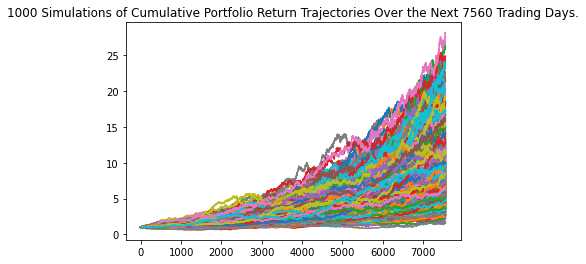

In [90]:
# Plot simulation outcomes
line_plot = MC_spy_agg.plot_simulation()

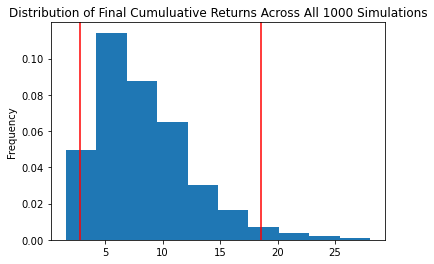

In [91]:
# Plot probability distribution and confidence intervals
dist_plot = MC_spy_agg.plot_distribution()

### Retirement Analysis

In [92]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_spy_agg.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               8.378675
std                4.146742
min                1.555545
25%                5.411327
50%                7.532064
75%               10.577434
max               28.070745
95% CI Lower       2.787615
95% CI Upper      18.534414
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [93]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55752.3 and $370688.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [94]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $83628.44 and $556032.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [96]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_spy_agg_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 1000,
    num_trading_days = 252*5)



In [97]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_spy_agg_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjmcd\FinTech\upenn-phi-virt-fin-pt-08-2021-u-c-master-05-APIs\upenn-phi-virt-fin-pt-08-2021-u-c-master-05-APIs\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989998,0.999652,1.009675,0.997646,1.008573,0.995644,0.997377,1.000833,1.008974,0.998708,...,0.994416,0.996208,0.994379,1.010506,1.004655,0.998716,1.000025,1.003247,1.004949,0.995193
2,0.987529,1.004266,1.000048,0.992572,1.007041,0.990017,1.005628,0.998719,1.000603,1.000767,...,1.000479,0.994324,0.992799,1.005366,1.011550,0.998518,0.998213,1.008935,0.997654,0.993918
3,0.985725,0.998747,0.994022,0.996866,1.013740,0.989317,1.006934,0.994355,1.010849,0.988524,...,1.006773,0.985745,0.989585,1.009588,1.015581,0.997011,0.996867,1.007218,0.997129,0.993079
4,0.985808,1.001698,0.996438,0.997233,1.017071,0.980674,1.006170,0.993297,1.021505,0.995202,...,0.997023,0.986530,0.989836,1.021581,1.015209,0.994878,0.992322,1.024413,1.001276,0.998951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.359266,1.416560,1.926852,1.513931,1.344456,1.049070,1.245914,1.798009,1.366719,1.336470,...,1.204587,1.434021,1.782073,1.686377,1.581591,1.316189,1.157469,1.132410,0.813149,1.798200
1257,1.365458,1.417505,1.910942,1.514425,1.344170,1.048723,1.258758,1.796447,1.365539,1.330431,...,1.189565,1.429024,1.788926,1.700524,1.570404,1.324383,1.160116,1.122725,0.812659,1.803215
1258,1.371768,1.429972,1.895825,1.521528,1.345866,1.053285,1.253630,1.793194,1.371922,1.318710,...,1.202890,1.449851,1.808270,1.713473,1.573181,1.337828,1.159002,1.127636,0.809767,1.813312
1259,1.373673,1.444531,1.901968,1.504515,1.340298,1.043978,1.256606,1.810079,1.377829,1.317647,...,1.199107,1.458796,1.814891,1.714660,1.581736,1.342970,1.160159,1.121245,0.815706,1.813714


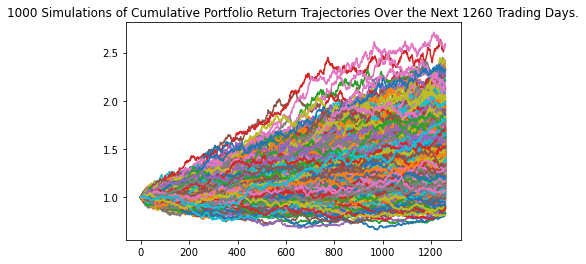

In [98]:
# Plot simulation outcomes
line_plot = MC_spy_agg_5.plot_simulation()

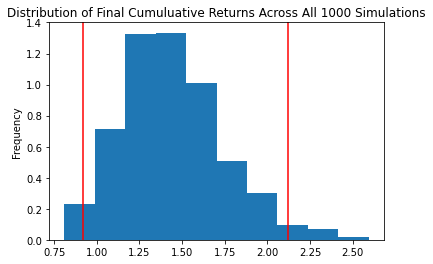

In [100]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_spy_agg_5.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5 = MC_spy_agg_5.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5)

count           1000.000000
mean               1.443869
std                0.297950
min                0.810101
25%                1.227412
50%                1.419873
75%                1.625830
max                2.593978
95% CI Lower       0.917197
95% CI Upper       2.119629
Name: 1260, dtype: float64


In [103]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5[8]*initial_investment,2)
ci_upper_five = round(even_tbl_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55031.81 and $127177.76


### Ten Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_spy_agg_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 1000,
    num_trading_days = 252*10)

In [107]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_spy_agg_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjmcd\FinTech\upenn-phi-virt-fin-pt-08-2021-u-c-master-05-APIs\upenn-phi-virt-fin-pt-08-2021-u-c-master-05-APIs\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006116,1.002208,1.003689,1.003717,1.001749,0.998994,1.001404,0.999757,0.993423,0.994181,...,1.000948,0.993803,0.995312,1.005235,0.998631,0.992153,0.999042,0.986146,0.992823,1.005284
2,1.006343,1.002125,0.992835,1.005316,0.992512,0.987709,1.001260,0.993766,0.984013,0.998826,...,1.004438,0.988026,0.994840,1.006411,0.996703,0.995149,1.002405,0.976247,0.995111,1.008920
3,1.012592,1.000535,0.985350,1.009846,0.988928,0.971187,0.996640,0.996901,0.984743,0.994441,...,1.000961,0.991938,0.989568,1.002893,0.997406,0.991785,1.004536,0.976807,0.998647,1.005694
4,1.006539,1.013890,0.975681,1.005534,0.992986,0.979205,0.997753,0.997420,0.981118,0.985676,...,0.994151,0.991694,0.997088,0.997517,0.985899,0.993103,1.010864,0.975995,1.001366,1.019224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.438119,1.836577,1.749521,2.292053,2.671513,1.836280,2.341824,1.659504,1.950266,2.520529,...,2.369404,2.413210,2.065883,2.197123,3.467918,1.694777,3.292166,3.470038,2.470955,1.251889
2517,1.452669,1.856364,1.753480,2.283107,2.663926,1.825679,2.332687,1.657770,1.961801,2.535579,...,2.347572,2.413142,2.067209,2.192545,3.476011,1.697888,3.275246,3.490854,2.462243,1.253928
2518,1.444122,1.854663,1.761154,2.296378,2.669481,1.844980,2.330249,1.655384,1.964246,2.538859,...,2.351435,2.441151,2.075699,2.180689,3.463678,1.703063,3.266438,3.489249,2.459166,1.266427
2519,1.442026,1.857145,1.762557,2.297747,2.656894,1.850260,2.345446,1.653641,1.969108,2.522308,...,2.353404,2.426377,2.077354,2.191900,3.475894,1.689470,3.260281,3.486935,2.433550,1.258214


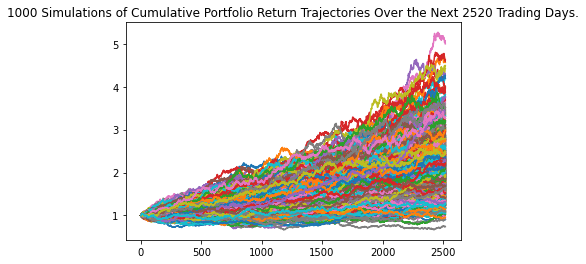

In [110]:
# Plot simulation outcomes
line_plot = MC_spy_agg_ten.plot_simulation()

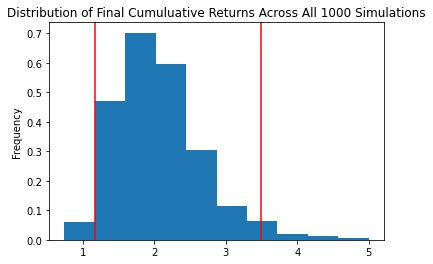

In [111]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_spy_agg_ten.plot_distribution()

In [112]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10 = MC_spy_agg_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10)

count           1000.000000
mean               2.067135
std                0.606203
min                0.740290
25%                1.627832
50%                1.983664
75%                2.380944
max                4.997824
95% CI Lower       1.163603
95% CI Upper       3.494876
Name: 2520, dtype: float64


In [113]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_10[8]*initial_investment,2)
ci_upper_ten = round(even_tbl_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69816.19 and $209692.57
